# Time Series Analysis using Prophet

---

<p align="justify">This notebook demonstrates how to use the Prophet library to perform time series analysis and forecasting. We will create a dummy dataset, fit a Prophet model to the data, and then make future predictions. Finally, we will visualize the forecast and its components.

---

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet

## Create Dummy Dataset

In [ ]:
df = pd.DataFrame(
    {
        "ds": pd.date_range(start="2023-01-01", periods=100),
        "y": [x * 0.5 + 10 for x in range(100)],
    }
)

In [ ]:
df

,ds,y
0,2023-01-01,10.0
1,2023-01-02,10.5
2,2023-01-03,11.0
3,2023-01-04,11.5
4,2023-01-05,12.0
...,...,...
95,2023-04-06,57.5
96,2023-04-07,58.0
97,2023-04-08,58.5
98,2023-04-09,59.0


## Create and Fit the Model

In [ ]:
model = Prophet() # Call the model
model.fit(df) # Fit the model with df

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgwq5b313/ofmhi6pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgwq5b313/qwar3tor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74326', 'data', 'file=/tmp/tmpgwq5b313/ofmhi6pu.json', 'init=/tmp/tmpgwq5b313/qwar3tor.json', 'output', 'file=/tmp/tmpgwq5b313/prophet_model45728ygn/prophet_model-20250918020450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Make Future Prediction

In [ ]:
# Forecast 30 days ahead (default: daily frequency)
future = model.make_future_dataframe(periods=30)

# Prophet defaults to days. To forecast in hours or minutes, use the `freq` parameter:
# Example: predict the next 10 hours
# future = model.make_future_dataframe(periods=10, freq="H")   # H = Hours
#
# Example: predict the next 10 minutes
# future = model.make_future_dataframe(periods=10, freq="min") # min = Minutes

forecast = model.predict(future)

In [ ]:
forecast # The output will give you a dataframe which has the lower limit of the forecast and the upper limit of the forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,10.000106,9.999770,10.000390,10.000106,10.000106,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,0.0,0.0,0.0,10.000087
1,2023-01-02,10.500037,10.499737,10.500331,10.500037,10.500037,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,0.0,0.0,0.0,10.500031
2,2023-01-03,10.999969,10.999671,11.000281,10.999969,10.999969,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.0,0.0,0.0,10.999977
3,2023-01-04,11.499900,11.499623,11.500227,11.499900,11.499900,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.0,0.0,0.0,11.499918
4,2023-01-05,11.999965,11.999685,12.000298,11.999965,11.999965,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.0,0.0,0.0,11.999976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2023-05-06,72.499947,72.498040,72.502038,72.498010,72.501976,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,0.0,0.0,0.0,72.499935
126,2023-05-07,72.999946,72.997939,73.002012,72.997925,73.002090,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,0.0,0.0,0.0,72.999928
127,2023-05-08,73.499945,73.497740,73.502232,73.497805,73.502206,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,0.0,0.0,0.0,73.499939
128,2023-05-09,73.999944,73.997648,74.002384,73.997688,74.002312,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.0,0.0,0.0,73.999952


#Plot the Forecast

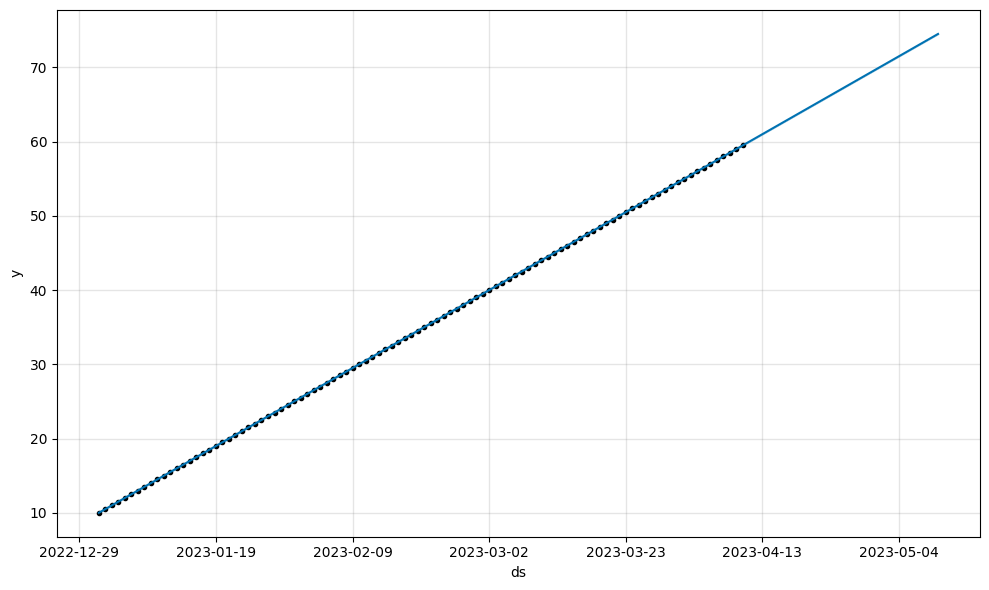

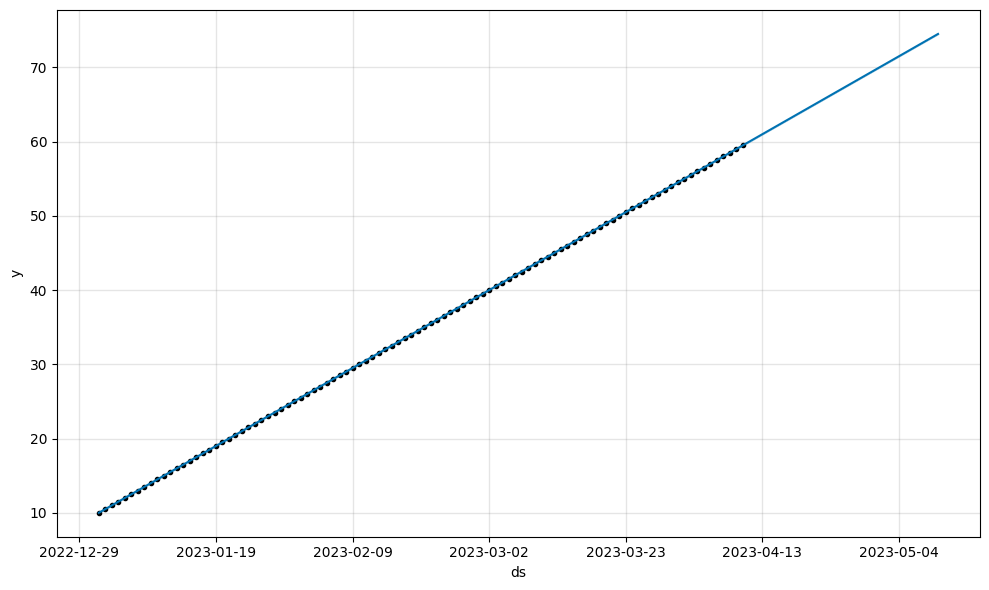

In [ ]:
model.plot(forecast)

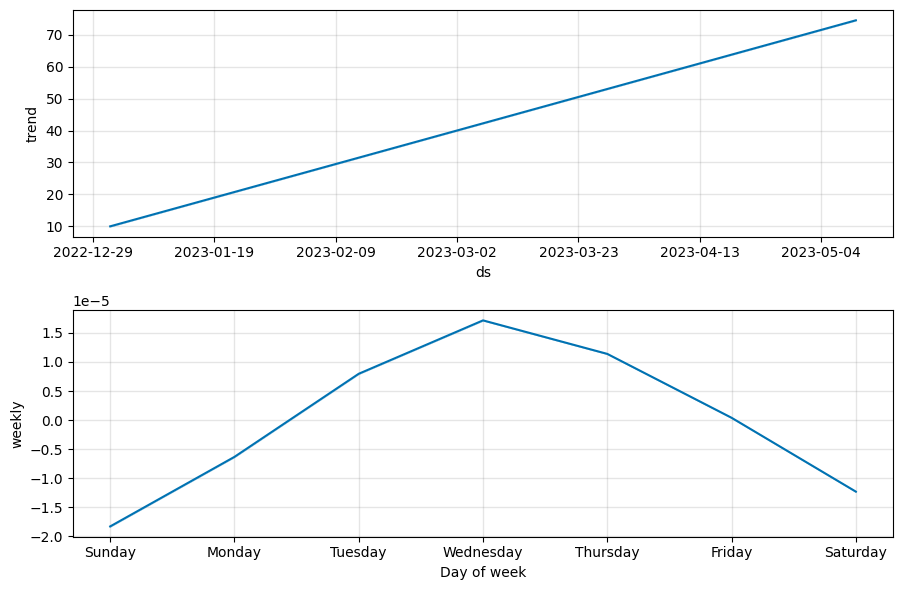

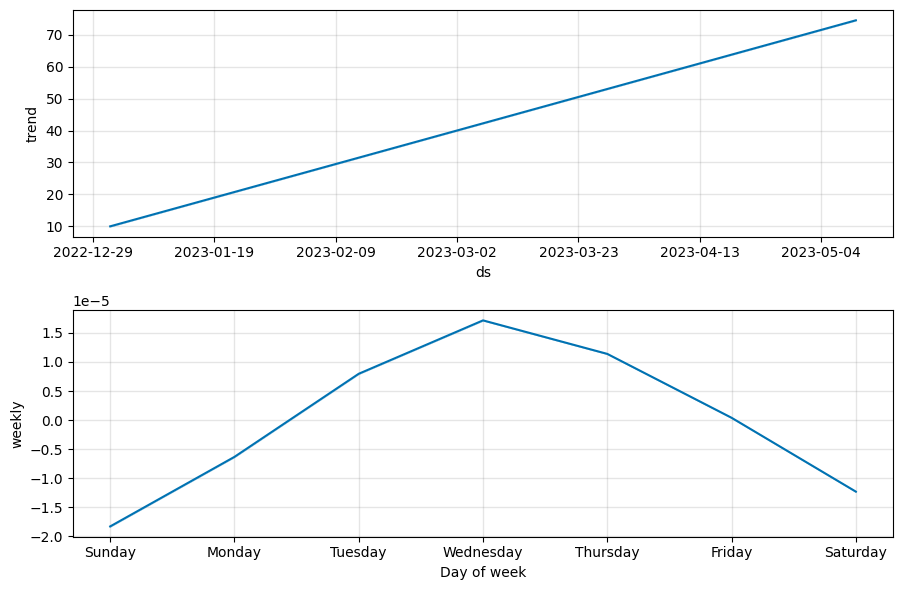

In [ ]:
model.plot_components(forecast)

## Conclusion

We successfully demonstrated the use of the Prophet library for time series forecasting. We created a simple dataset, fitted a Prophet model, and generated a forecast. The plots show the trend and weekly seasonality of the data, along with the predicted future values. This example provides a basic framework for applying Prophet to your own time series data.